<a href="https://colab.research.google.com/github/ayakawamura/practice_python/blob/main/machine_learning_editor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 機械学習実装

1. データの特徴について確認します。（6問）
    - 各変数のデータ型、行列数、統計量を算出し、今回扱うデータの外観を把握します。
2. データを加工する方法について学習します。（11問）
    - 各変数をモデルに入れる形に整えます。（特徴量生成フェーズ）
3. 特徴量の選別方法について学習します。（11問）
    - 各特徴量の詳細な特徴を把握し、目的変数との関連性を確認します。（特徴量評価フェーズ）
4. 学習データと検証データに分割することについて学習します。（3問）
    - 学習に使用したデータは検証に使用できません。モデリング前の下準備について把握します。
5. 決定木モデルについて学習します。（分類）（23問）
    - 決定木モデルを参考に機械学習のフローについて理解し、精度を算出することが目的です。
6. ロジスティック回帰について学習します。（分類）（8問）
    - ロジスティック回帰で精度を算出することが目的です。
7. ランダムフォレストについて学習します。（分類、回帰）（16問）
    - ランダムフォレストモデルで精度を算出することが目的です。
8. Kmeans法について学習します。（クラスタリング）（15問）
    - Kmeansで分類し、分類結果を次元削減して2次元で可視化します。

### 0. 事前準備

#### 0.1  必要なライブラリを読み込んで下さい。

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Jupyter 上で図を表示するためのコマンド
%matplotlib inline

# warningを表示させない
warnings.simplefilter('ignore')

#### 0.2  訓練データと検証データを分ける関数、精度評価を行う関数を読み込んで下さい。

In [ ]:
# 必要な関数を読み込む
from sklearn.model_selection import train_test_split # 訓練データと検証データに分ける関数
from sklearn.metrics import confusion_matrix, accuracy_score # 混同行列, 予測正解率を求める関数

#### 0.3  今回使用する「タイタニック」データを読み込んで下さい。

In [ ]:
# タイタニックデータを読み込む
titanic_data = pd.read_csv(filepath_or_buffer='https://wals.s3-ap-northeast-1.amazonaws.com/curriculum/ai/titanic3.csv',
                          sep=',', dtype={'pclass':'str'})

#### 0.4  今回使用する「タイタニック」データは以下のようなデータになっています。

- PassengerID: 　乗客ID
- Survived: 　生存結果 (1: 生存, 0: 死亡)　
- Pclass: 　乗客の階級、1が一番位が高い
- Name: 　乗客の名前
- Sex:　 性別
- Age: 　年齢
- SibSp: 　兄弟、配偶者の数
- Parch: 　両親、子供の数
- Ticket: 　チケット番号
- Fare: 　乗船料金
- Cabin: 　部屋番号
- Embarked: 　乗船した港　Cherbourg、Queenstown、Southamptonの3種類
- boat: 　乗ったボート（生きていた場合）
- body: 　身体識別番号
- home.dest: 　目的地

### 1. データの特徴について確認します。（6問）

#### 1.1 レコード数を確認してください。

In [ ]:
len(titanic_data)

1309

#### 1.2 カラムの数を確認してください。

In [ ]:
len(titanic_data.columns)

14

#### 1.3 上から5行データを確認してください。

In [ ]:
titanic_data.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


#### 1.4 各カラムのデータ型を確認してください。※objectデータは今後数値データに変更する必要があります。

In [ ]:
titanic_data.dtypes

pclass        object
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

#### 1.5 各カラムの統計量を算出してください。※object以外

In [ ]:
titanic_data.describe().round(1)

,survived,age,sibsp,parch,fare,body
count,1309.0,1046.0,1309.0,1309.0,1308.0,121.0
mean,0.4,29.9,0.5,0.4,33.3,160.8
std,0.5,14.4,1.0,0.9,51.8,97.7
min,0.0,0.2,0.0,0.0,0.0,1.0
25%,0.0,21.0,0.0,0.0,7.9,72.0
50%,0.0,28.0,0.0,0.0,14.5,155.0
75%,1.0,39.0,1.0,0.0,31.3,256.0
max,1.0,80.0,8.0,9.0,512.3,328.0


#### 1.6 objectデータが格納されているカラムの情報を出力してください。

In [ ]:
titanic_data.describe(include="object")

,pclass,name,sex,ticket,cabin,embarked,boat,home.dest
count,1309,1309,1309,1309,295,1307,486,745
unique,3,1307,2,929,186,3,27,369
top,3,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S,13,"New York, NY"
freq,709,2,843,11,6,914,39,64


### 2.データを加工する方法について学習します。（11問）

#### 2.1 object型のデータを削除し、削除されていることを確認してください。

In [ ]:
data= titanic_data.select_dtypes(exclude="object")
data

,survived,age,sibsp,parch,fare,body
0,1,29.00,0,0,211.3375,NaN
1,1,0.92,1,2,151.5500,NaN
2,0,2.00,1,2,151.5500,NaN
3,0,30.00,1,2,151.5500,135.0
4,0,25.00,1,2,151.5500,NaN
...,...,...,...,...,...,...
1304,0,14.50,1,0,14.4542,328.0
1305,0,NaN,1,0,14.4542,NaN
1306,0,26.50,0,0,7.2250,304.0
1307,0,27.00,0,0,7.2250,NaN


#### 2.2 各カラムの欠損値数を算出してください。(※object型のデータ除外後)

In [ ]:
data.isnull().sum()

survived       0
age          263
sibsp          0
parch          0
fare           1
body        1188
dtype: int64

#### 2.3 欠損値は補完する必要があります。「age」の分布を確認して下さい。

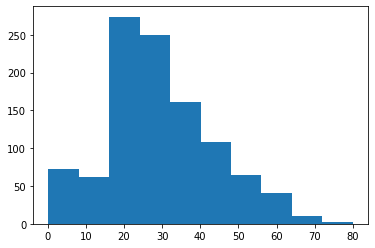

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(data["age"])
plt.show()

#### 2.4 分布を確認すると20代が多いようです。欠損値には「age」の平均値を補完してみましょう。

In [ ]:
mean = data["age"].mean()
data['age'].fillna(mean, inplace=True)
data

,survived,age,sibsp,parch,fare,body
0,1,29.000000,0,0,211.3375,NaN
1,1,0.920000,1,2,151.5500,NaN
2,0,2.000000,1,2,151.5500,NaN
3,0,30.000000,1,2,151.5500,135.0
4,0,25.000000,1,2,151.5500,NaN
...,...,...,...,...,...,...
1304,0,14.500000,1,0,14.4542,328.0
1305,0,29.881138,1,0,14.4542,NaN
1306,0,26.500000,0,0,7.2250,304.0
1307,0,27.000000,0,0,7.2250,NaN


#### 2.5 「age」に欠損値が無くなったことを確認してください。

In [ ]:
data['age'].isnull().sum()

0

#### 2.6 bodyの欠損値も補完する必要があります。「body」の分布を確認して下さい。

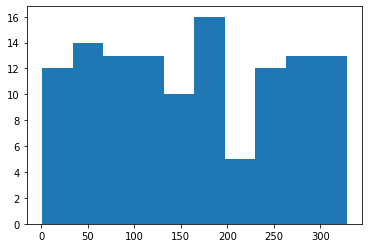

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(data["body"])
plt.show()

#### 2.7 欠損値が非常に多いです。欠損に意味を持たせるために、今存在しない値である「－1」を補完してみましょう。

In [ ]:
data["body"].fillna(-1, inplace=True)
data

,survived,age,sibsp,parch,fare,body
0,1,29.000000,0,0,211.3375,-1.0
1,1,0.920000,1,2,151.5500,-1.0
2,0,2.000000,1,2,151.5500,-1.0
3,0,30.000000,1,2,151.5500,135.0
4,0,25.000000,1,2,151.5500,-1.0
...,...,...,...,...,...,...
1304,0,14.500000,1,0,14.4542,328.0
1305,0,29.881138,1,0,14.4542,-1.0
1306,0,26.500000,0,0,7.2250,304.0
1307,0,27.000000,0,0,7.2250,-1.0


#### 2.8 bodyに欠損値が無くなったことを確認してください。

In [ ]:
data['body'].isnull().sum()


0

#### 2.9 fareの欠損値も補完する必要があります。「fare」の分布を確認して下さい。

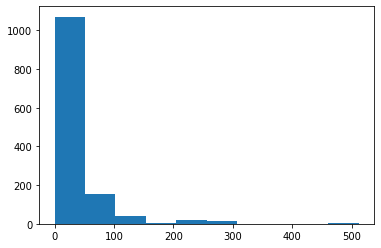

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(data["fare"])
plt.show()

#### 2.10 fareの欠損値は1件です。レコードを削除しても殆ど影響が無いので、削除してしまいましょう。1行減ったことを確認して下さい。

In [ ]:
data.dropna(subset=["fare"], inplace=True)
data.shape

(1308, 6)

#### 2.11 欠損値が無くなったことを確認して下さい。

In [ ]:
data.isnull().any()

survived    False
age         False
sibsp       False
parch       False
fare        False
body        False
dtype: bool

### 3. 特徴量の選別方法について学習します。（11問）

#### 目的変数と説明変数の関連性の調査を行います。目的変数に対してどういう変数が影響力を持っているか、前もって調査しておくことは大切です。その方法について学んでいきましょう。今回の目的変数は「survived」です。生存：1、死亡：0となります。

#### 3.1 「sibsp」のユニーク値毎に、生存割合を算出して下さい。※小数点3桁で表示して下さい。

In [ ]:
data.groupby("sibsp").mean()['survived'].round(3)

sibsp
0    0.347
1    0.511
2    0.452
3    0.300
4    0.136
5    0.000
8    0.000
Name: survived, dtype: float64

#### 3.2 「parch」のユニーク値毎に、生存割合を算出してください。※小数点3桁で表示して下さい。

In [ ]:
data.groupby('parch').mean()['survived'].round(3)

parch
0    0.336
1    0.588
2    0.504
3    0.625
4    0.167
5    0.167
6    0.000
9    0.000
Name: survived, dtype: float64

#### 3.3 「parch」のユニーク値毎に、生存の件数を出力する下記グラフを出力してください。

<Figure size 432x288 with 0 Axes>

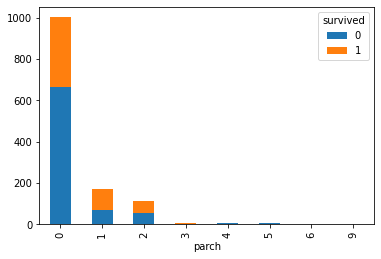

In [ ]:
fig = plt.figure()

parch_data = pd.crosstab(data['parch'],data['survived'])
parch_data.plot.bar(stacked=True)


#### 3.4 「age」はユニーク数が多く、値をグルーピングする必要があります。値を「10」刻みでグループ化し、各グループ毎に生存割合を算出してください。

In [ ]:
age_group = pd.cut(data['age'],[0,10,20,30,40,50,60,70,80,90,100])

data.groupby(age_group).mean()["survived"].round(3)

age
(0, 10]      0.581
(10, 20]     0.395
(20, 30]     0.332
(30, 40]     0.424
(40, 50]     0.394
(50, 60]     0.484
(60, 70]     0.231
(70, 80]     0.333
(80, 90]       NaN
(90, 100]      NaN
Name: survived, dtype: float64

#### 3.5「3.4」の生存の件数グラフを出力してください。

<Figure size 432x288 with 0 Axes>

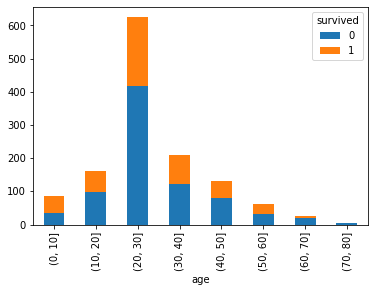

In [ ]:
fig = plt.figure()
age_group = pd.cut(data['age'],[0,10,20,30,40,50,60,70,80,90,100])
age_data = pd.crosstab(age_group,data['survived'])
age_data.plot.bar(stacked=True)


#### 3.6 「fare」はユニーク数が多く、値をグルーピングする必要があります。値を昇順にして上から順番に「件数ができるだけ均等になるよう」グループ化を行い、各グループ毎に生存割合を算出してください。※値に重複があるので、完全に均等にする必要はありません。

In [ ]:
fare_group = pd.qcut(data["fare"],5 )
data.groupby(fare_group).mean()["survived"].round(3)

fare
(-0.001, 7.854]      0.258
(7.854, 10.5]        0.201
(10.5, 21.679]       0.380
(21.679, 41.579]     0.458
(41.579, 512.329]    0.618
Name: survived, dtype: float64

#### 3.7「3.6」の生存の件数グラフを出力してください。

<Figure size 432x288 with 0 Axes>

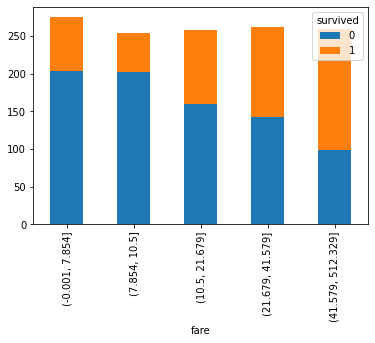

In [ ]:
fig = plt.figure()
fare_group = pd.qcut(data["fare"],5 )
fare_data = pd.crosstab(fare_group,data['survived'])
fare_data.plot.bar(stacked=True)


#### 3.8 「body」はユニーク数が多く、値をグルーピングする必要があります。最大値と最小値の間を等間隔で5分割してください。

In [ ]:
body_group = pd.cut(data["body"],5)
data.groupby(body_group).mean()["survived"].round(3)

body
(-1.329, 64.8]    0.412
(64.8, 130.6]     0.000
(130.6, 196.4]    0.000
(196.4, 262.2]    0.000
(262.2, 328.0]    0.000
Name: survived, dtype: float64

#### 3.9「3.8」の生存の件数グラフを出力してください。

<Figure size 432x288 with 0 Axes>

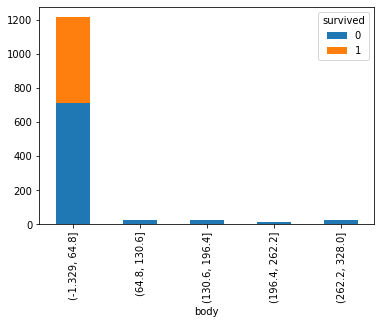

In [ ]:
fig = plt.figure()
body_group = pd.cut(data['body'],5)
body_data = pd.crosstab(body_group,data['survived'])
body_data.plot.bar(stacked=True)


#### 3.10 各変数間の相関係数を算出してください。

In [ ]:
data.corr()

,survived,age,sibsp,parch,fare,body
survived,1.000000,-0.048887,-0.028122,0.082418,0.244265,-0.211151
age,-0.048887,1.000000,-0.190304,-0.130355,0.171893,0.136776
sibsp,-0.028122,-0.190304,1.000000,0.373485,0.160238,-0.051933
parch,0.082418,-0.130355,0.373485,1.000000,0.221539,-0.023011
fare,0.244265,0.171893,0.160238,0.221539,1.000000,-0.012274
body,-0.211151,0.136776,-0.051933,-0.023011,-0.012274,1.000000


#### 3.11 「3.10」はこのままだと少し見辛いので、ヒートマップを作成してください。

In [ ]:
data.corr().style.background_gradient()

,survived,age,sibsp,parch,fare,body
survived,1.000000,-0.048887,-0.028122,0.082418,0.244265,-0.211151
age,-0.048887,1.000000,-0.190304,-0.130355,0.171893,0.136776
sibsp,-0.028122,-0.190304,1.000000,0.373485,0.160238,-0.051933
parch,0.082418,-0.130355,0.373485,1.000000,0.221539,-0.023011
fare,0.244265,0.171893,0.160238,0.221539,1.000000,-0.012274
body,-0.211151,0.136776,-0.051933,-0.023011,-0.012274,1.000000


### 4. 学習データと検証データに分割する方法を学習します。（3問）

#### 先程のフェーズでは、全て数値データに変換し、今回予測する「生存」との関連性を評価しました。今フェーズはモデルの作成の為の最終準備です。未知のデータに対する予測値を算出したいので、学習に使用するデータと検証に使用するデータを分割し、擬似的に未知データを作り出します。

#### 4.1 決定木のライブラリをインポートして下さい。

In [ ]:
from sklearn import tree

#### 4.2 説明変数と目的変数を分けて、それぞれ「X」,「y」と言う変数名に格納し、カラム名を確認して下さい。

In [ ]:
X = data.drop("survived",axis=1)
y = data["survived"]
print(X.shape)
print(y.shape)

(1308, 5)
(1308,)


#### 4.3 説明変数、目的変数をそれぞれ学習データと検証データを7:3の割合で作成して下さい。変数名はX_train（説明変数の学習データ）, X_test（説明変数の検証データ）, y_train（目的変数の学習データ）, y_test（目的変数の検証データ）として下さい。その際インデックスのシャッフルはしないようにして、各変数の上5行を確認して下さい。

In [ ]:
X_train, X_test = train_test_split(X, test_size=0.3, shuffle=False)
y_train, y_test = train_test_split(y, test_size=0.3, shuffle=False)

print(X_train.head(5))
print(X_test.head(5))
print(y_train.head(5))
print(y_test.head(5))

     age  sibsp  parch      fare   body
0  29.00      0      0  211.3375   -1.0
1   0.92      1      2  151.5500   -1.0
2   2.00      1      2  151.5500   -1.0
3  30.00      1      2  151.5500  135.0
4  25.00      1      2  151.5500   -1.0
           age  sibsp  parch     fare  body
915  22.000000      0      0   7.5208  -1.0
916   4.000000      0      1  13.4167  -1.0
917  39.000000      0      1  13.4167  -1.0
918  29.881138      0      0   7.2292  -1.0
919  18.500000      0      0   7.2292  58.0
0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64
915    0
916    1
917    1
918    0
919    0
Name: survived, dtype: int64


### 5. モデリング方法について学習します。（23問）

#### この章では、決定木モデルを例にして機械学習の一般的なフロー（パラメータチューニング、特徴量の追加、評価指標）を学習します。（モデルを作成するときはrandom_state=0を指定してください。）

#### 5.1 分類木を読み込んで、decision_treeと言う名前を付け、引数random_stateのみ「0」を指定し、下記のような決定木のパラメータ値を出力してください。※random_stateに数字を入れることで、結果を固定することができます。

In [ ]:
decision_tree = tree.DecisionTreeClassifier(random_state=0)
decision_tree

DecisionTreeClassifier(random_state=0)

#### 5.2 fit関数を使い、学習データを使用して決定木を作成して下さい。※ここが「学習」と呼ばれる処理になります。

In [ ]:
decision_tree = decision_tree.fit(X_train, y_train)
print(decision_tree)

DecisionTreeClassifier(random_state=0)


#### 5.3 「5.2」で決定木は作成できました。作成した決定木を用いて、新規データ（X_test）に対する予測値を出力してください。※ここが「予測」と呼ばれる処理になります。

In [ ]:
predicted = decision_tree.predict(X_test)
predicted

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,

#### 5.4 精度を確認していきましょう。学習データに使用しなかった「目的変数の検証データ（y_test）」を使用して、正解率を算出してください。

In [ ]:
accuracy_score(y_test, predicted)

0.6615776081424937

#### 5.5 今回の結果の混合行列を出力してください。

In [ ]:
confusion_matrix(y_test, predicted)

array([[228,  65],
       [ 68,  32]])

#### 5.6 正解率は算出できましたが、まだまだ向上の余地がありそうです。「max_depth」を「4」に設定して正解率を算出し直しましょう。

In [ ]:
decision_tree = tree.DecisionTreeClassifier(random_state=0, max_depth=4)
decision_tree = decision_tree.fit(X_train, y_train)
predicted2 = decision_tree.predict(X_test)
accuracy_score(y_test, predicted2)

0.6870229007633588

#### 5.7 やや正解率が向上したようです。混合行列も確認してみましょう。

In [ ]:
confusion_matrix(y_test, predicted2)

array([[263,  30],
       [ 93,   7]])

#### 5.8 様々なパラメータを試す余地がありそうです。2～6までの順続きのリストを作成し、「min_samples_split_list」と名前を付けて下さい。

In [ ]:
min_samples_split_list = np.arange(2,7)
min_samples_split_list

array([2, 3, 4, 5, 6])

#### 5.9 for文を使用し、「5.8」で作成したリストの要素分、「min_samples_split」を試して下さい。※「min_samples_split」とは、分岐に必要な最小サンプル数のことです。過学習を抑制するために使用されます。

In [ ]:
for min_samples_split in min_samples_split_list:
  decision_tree = tree.DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=0)
  decision_tree = decision_tree.fit(X_train, y_train)
  predicted = decision_tree.predict(X_test)
  print(min_samples_split,accuracy_score(y_test, predicted))

2 0.6615776081424937
3 0.6641221374045801
4 0.6437659033078881
5 0.6513994910941476
6 0.6590330788804071


#### 5.10 大きな効果は確認できませんでした。他のパラメータも試してみましょう。0～0.1まで、0.02刻みのリストを作成し、「min_impurity_decrease_list」と名前を付けて下さい。

In [ ]:
min_impurity_decrease_list = np.arange(0,0.1,0.02)
min_impurity_decrease_list

array([0.  , 0.02, 0.04, 0.06, 0.08])

#### 5.11 for文を使用し、「5.10」で作成したリストの要素分、「min_impurity_decrease」を試して下さい。※「min_impurity_decrease」とは、分岐をどこで止めるかの判断指標です。大きな値にすると、過学習が抑制されます。

In [ ]:
for min_impurity_decrease in min_impurity_decrease_list:
  decision_tree = tree.DecisionTreeClassifier(min_impurity_decrease=min_impurity_decrease, random_state=0)
  decision_tree = decision_tree.fit(X_train, y_train)
  predicted = decision_tree.predict(X_test)
  print(min_impurity_decrease,accuracy_score(y_test, predicted))

0.0 0.6615776081424937
0.02 0.6437659033078881
0.04 0.628498727735369
0.06 0.7455470737913485
0.08 0.7455470737913485


#### 5.12 正解率は「min_impurity_decrease」が0.06以上で向上していることが確認できますが、本当にこれで大丈夫でしょうか。混合行列を確認してきましょう。

In [ ]:
confusion_matrix(y_test, predicted)

array([[293,   0],
       [100,   0]])

#### 5.13 全ての人に対し「0＝死亡」と予測してしまっているようです。正解率ではなく他の指標も確認してきましょう。適合率を算出して下さい。※適合率は生存と予測された人間のうち正解した人間の割合のことです。

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, predicted)

0.0

#### 5.14 再現率を算出して下さい。※再現率は生存した人間のうち正解した人間の割合のことです。

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, predicted)

0.0

#### 5.15 F値を算出して下さい。※F値（F1-measure）は適合率と再現率の調和平均のことです。

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, predicted)

0.0

#### 5.16 生存していた人を評価する指標だと軒並み「0」になってしまうことが確認できました。正解率は分かりやすい指標ですが、今回のように「生存」と「死亡」の割合に差があるケースだと、間違った示唆を生み出してしまう可能性があります。それでは、「5.9」と「5.11」のリストの組み合わせ分、F値を算出して下さい。

In [ ]:
from sklearn.metrics import f1_score
for min_samples_split in min_samples_split_list:
  for min_impurity_decrease in min_impurity_decrease_list:
    decision_tree = tree.DecisionTreeClassifier(min_samples_split=min_samples_split, min_impurity_decrease=min_impurity_decrease, random_state=0)
    decision_tree = decision_tree.fit(X_train, y_train)
    predicted = decision_tree.predict(X_test)
    print(min_samples_split, min_impurity_decrease, f1_score(y_test, predicted))

2 0.0 0.32487309644670054
2 0.02 0.21348314606741575
2 0.04 0.20652173913043478
2 0.06 0.0
2 0.08 0.0
3 0.0 0.29787234042553196
3 0.02 0.21348314606741575
3 0.04 0.20652173913043478
3 0.06 0.0
3 0.08 0.0
4 0.0 0.3137254901960784
4 0.02 0.21348314606741575
4 0.04 0.20652173913043478
4 0.06 0.0
4 0.08 0.0
5 0.0 0.33170731707317075
5 0.02 0.21348314606741575
5 0.04 0.20652173913043478
5 0.06 0.0
5 0.08 0.0
6 0.0 0.3163265306122449
6 0.02 0.21348314606741575
6 0.04 0.20652173913043478
6 0.06 0.0
6 0.08 0.0


#### 5.17 「min_samples_split＝5」、「min_impurity_decrease=0.0」が一番F値が高いです。もう少しパラメータチューニングの幅を広げてみましょう。「min_samples_split＝5から10まで1刻み」、「min_impurity_decrease=0から0.02まで0.005刻み」のリストの組み合わせを試し、ベストのF値とその時に使用したパラメータを出力して下さい。

In [ ]:
min_samples_split_list = np.arange(5,11)
min_impurity_decrease_list = np.arange(0,0.025,0.005)
best_score=0

from sklearn.metrics import f1_score
for min_samples_split in min_samples_split_list:
    for min_impurity_decrease in min_impurity_decrease_list:
        decision_tree = tree.DecisionTreeClassifier(min_samples_split=min_samples_split, min_impurity_decrease=min_impurity_decrease, random_state=0)
        decision_tree = decision_tree.fit(X_train, y_train)
        predicted = decision_tree.predict(X_test)

        score = f1_score(y_test, predicted)
        if score > best_score:
          best_score = score
          best_parameters = {"min_samples_split":min_samples_split, "min_impurity_decrease":min_impurity_decrease, "best_score":best_score}

print(best_parameters)


{'min_samples_split': 8, 'min_impurity_decrease': 0.0, 'best_score': 0.3333333333333333}


#### 5.18 パラメータをうまく設定することで精度が向上することが分かりました。様々なパラメータを試すことで、データに合ったモデルを作成することができます。次は、特徴量の観点でも考えてみましょう。「3.8」,「3.9」より「body」はあまり良い情報を持っていないことが確認できます。この変数を削除してみて下さい。

In [ ]:
X_train.drop('body',axis=1,inplace=True)
X_test.drop('body',axis=1,inplace=True)
print("X_train:",X_train.columns)
print("X_test:",X_train.columns)

X_train: Index(['age', 'sibsp', 'parch', 'fare'], dtype='object')
X_test: Index(['age', 'sibsp', 'parch', 'fare'], dtype='object')


#### 5.19 「5.17」の処理を回して、ベストスコアを確認して下さい。 

In [ ]:
min_samples_split_list = np.arange(5,11)
min_impurity_decrease_list = np.arange(0,0.025,0.005)
best_score=0

from sklearn.metrics import f1_score
for min_samples_split in min_samples_split_list:
    for min_impurity_decrease in min_impurity_decrease_list:
        decision_tree = tree.DecisionTreeClassifier(min_samples_split=min_samples_split, min_impurity_decrease=min_impurity_decrease, random_state=0)
        decision_tree = decision_tree.fit(X_train, y_train)
        predicted = decision_tree.predict(X_test)

        score = f1_score(y_test, predicted)
        if score > best_score:
          best_score = score
          best_parameters = {"min_samples_split":min_samples_split, "min_impurity_decrease":min_impurity_decrease, "best_score":best_score}

print(best_parameters)


{'min_samples_split': 9, 'min_impurity_decrease': 0.0, 'best_score': 0.34449760765550236}


#### 5.20 変数追加も考えてみましょう。カテゴリデータの「sex」に関して下記グラフを作成して下さい。

<Figure size 432x288 with 0 Axes>

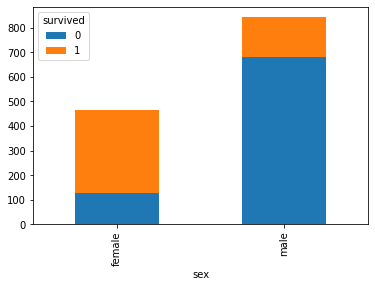

In [ ]:
fig = plt.figure()

sex_data = pd.crosstab(titanic_data['sex'],titanic_data['survived'])
sex_data.plot.bar(stacked=True)


#### 5.21 「sex」の変数は予測に寄与する可能性がありそうです。X_trainとX_testの変数にtitanic_dataからsexを追加して下さい。インデックスを変えないように注意して下さい。

In [ ]:
X_train["sex"] = titanic_data["sex"][:915]
X_test["sex"] = titanic_data["sex"][915:]
print("X_train:",X_train)
print("X_test:",X_test)

X_train:        age  sibsp  parch      fare     sex
0    29.00      0      0  211.3375  female
1     0.92      1      2  151.5500    male
2     2.00      1      2  151.5500  female
3    30.00      1      2  151.5500    male
4    25.00      1      2  151.5500  female
..     ...    ...    ...       ...     ...
910  17.00      0      0    7.1250    male
911  21.00      0      0    8.4333    male
912  30.00      0      0    7.8958    male
913  21.00      0      0    7.7958    male
914  33.00      0      0    7.8542    male

[915 rows x 5 columns]
X_test:             age  sibsp  parch     fare     sex
915   22.000000      0      0   7.5208    male
916    4.000000      0      1  13.4167  female
917   39.000000      0      1  13.4167    male
918   29.881138      0      0   7.2292    male
919   18.500000      0      0   7.2292    male
...         ...    ...    ...      ...     ...
1304  14.500000      1      0  14.4542  female
1305  29.881138      1      0  14.4542  female
1306  26.500000     

#### 5.22 「sex」はカテゴリ変数なので、maleを0、femaleを1に変更し、数字に変わっていることを確認して下さい。

In [ ]:
X_train['sex'] = np.where(X_train['sex']=='female',1,0)
X_test['sex'] = np.where(X_test['sex']=='female',1,0)
print(X_train['sex'].head())
print(X_test['sex'].head())

0    1
1    0
2    1
3    0
4    1
Name: sex, dtype: int64
915    0
916    1
917    0
918    0
919    0
Name: sex, dtype: int64


#### 5.23「5.17」の処理を回して、ベストスコアを確認して下さい。 

In [ ]:
min_samples_split_list = np.arange(5,11)
min_impurity_decrease_list = np.arange(0,0.025,0.005)
best_score=0

from sklearn.metrics import f1_score
for min_samples_split in min_samples_split_list:
    for min_impurity_decrease in min_impurity_decrease_list:
        decision_tree = tree.DecisionTreeClassifier(min_samples_split=min_samples_split, min_impurity_decrease=min_impurity_decrease, random_state=0)
        decision_tree = decision_tree.fit(X_train, y_train)
        predicted = decision_tree.predict(X_test)

        score = f1_score(y_test, predicted)
        if score > best_score:
          best_score = score
          best_parameters = {"min_samples_split":min_samples_split, "min_impurity_decrease":min_impurity_decrease, "best_score":best_score}

print(best_parameters)


{'min_samples_split': 5, 'min_impurity_decrease': 0.02, 'best_score': 0.5405405405405406}


### 6. ロジスティック回帰の方法について学習します。（8問）

#### モデルを作成するときはrandom_state=0を指定してください。

#### 6.1 ロジスティック回帰のライブラリをインストールして下さい。

In [ ]:
from sklearn.linear_model import LogisticRegression

#### 6.2 ロジスティック回帰を読み込んで、「logistic_regression」と言う変数名に設定して下さい。その上で引数random_stateのみ「0」を指定し、下記のようなロジスティック回帰のパラメータ値を出力してください。※random_stateに数字を入れることで、結果を固定することができます。

In [ ]:
logistic_regression = LogisticRegression(random_state=0) 
print(logistic_regression)

LogisticRegression(random_state=0)


#### 6.3 fit関数を使い、学習データを使用して、ロジスティック回帰の学習を行って下さい。

In [ ]:
logistic_regression = logistic_regression.fit(X_train, y_train)
logistic_regression

LogisticRegression(random_state=0)

#### 6.4 作成したモデルを用いて、新規データ（X_test）に対する予測値を出力してください。※ここが「予測」と呼ばれる処理になります。

In [ ]:
predicted = logistic_regression.predict(X_test)
predicted

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,

#### 6.5 混合行列を算出して下さい。

In [ ]:
confusion_matrix(y_test, predicted)

array([[235,  58],
       [ 40,  60]])

#### 6.6 F値を算出して下さい。

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, predicted)

0.5504587155963302

#### 6.7 ロジスティック回帰の主要パラメータである正則化項を変更してみましょう。下記の様なリストを作成し、C_listと言う変数名に格納して下さい。

#### 6.8 C_listの各値をパラメーター「C」に設定した際の精度を全て確認して下さい。

### 7. ランダムフォレストの方法について学習します。（16問）

#### ランダムフォレストは機械学習のアルゴリズムのひとつで、決定木を統合させて汎化能力を向上させる、アンサンブル学習アルゴリズムです。分類（判別）・回帰（予測）どちらも使用することができます。アンサンブル学習は精度が高くなる傾向にあります。（モデルを作成するときはrandom_state=0を指定してください。）

#### 7.1 ランダムフォレスト（分類木）のライブラリをインストールして下さい。

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#### 7.2 ランダムフォレストを読み込んで、「random_forest」と言う変数名に設定して下さい。その上で引数random_stateのみ「0」を指定し、下記のようなランダムフォレストのパラメータ値を出力してください。※random_stateに数字を入れることで、結果を固定することができます。

In [ ]:
random_forest = RandomForestClassifier(random_state=0)
random_forest

RandomForestClassifier(random_state=0)

#### 7.3 fit関数を使い、学習データを使用して、ランダムフォレストの学習を行って下さい。

In [ ]:
random_forest = random_forest.fit(X_train, y_train)
random_forest

RandomForestClassifier(random_state=0)

#### 7.4 作成したモデルを用いて、新規データ（X_test）に対する予測値を出力してください。※ここが「予測」と呼ばれる処理になります。

In [ ]:
predicted = random_forest.predict(X_test)
predicted

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,

#### 7.5 混合行列を算出して下さい。

In [ ]:
confusion_matrix(y_test, predicted)

array([[234,  59],
       [ 59,  41]])

#### 7.6 F値を算出して下さい。

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, predicted)

0.41

#### 7.7 デフォルト設定だとF値があまり良くないです。ランダムフォレストの主要パラメータであるn_estimotrs（木の数）、max_depth（木の深さ）、max_features（分岐に用いる説明変数の数を設定）を変更して見ましょう。下記のようなリストを作成して下さい。

#### 7.8 上記リストの組み合わせをパラメータとして設定し、ベストパラメータとその時のF値を算出して下さい。

#### 7.9 「7.8」の結果の通りランダムフォレストの様な「アンサンブル学習」はパラメータを確りチューニングする必要がありますが、精度が高くなる傾向にあります。最後にベストパラメータ時の変数需要度を算出して下さい。

#### 7.10 目的変数が量的変数の場合（回帰）を確認していきましょう。目的変数を「fare」に変更し、説明変数から削除して下さい。「age」,「sibsp」,「parch」,「sex」から「fare」を予測するモデルを作成することになります。

#### 7.11 ランダムフォレスト（回帰木）のライブラリをインストールして下さい。

#### 7.12 ランダムフォレスト（回帰木）を読み込んで、「random_forest」と言う変数名に設定して下さい。その上で引数random_stateのみ「0」を指定し、下記のようなランダムフォレストのパラメータ値を出力してください。※random_stateに数字を入れることで、結果を固定することができます。

#### 7.13 fit関数を使い、学習データを使用して、ランダムフォレストの学習を行って下さい。

#### 7.14 作成したモデルを用いて、新規データ（X_test）に対する予測値を出力（上から50行）してください。※ここが「予測」と呼ばれる処理になります。

#### 7.15 実測値と予測値の平均絶対誤差を出力して下さい。

#### 7.16 実測値と予測値の散布図を下記の形で出力して下さい。

### 8. K-meansの方法について学習します。（15問）

#### K-means法は、非階層型クラスタリングのアルゴリズムです。クラスタの平均を用い、与えられたクラスタ数k個に分類することから、K-means法と呼ばれています。（モデルを作成するときはrandom_state=0を指定してください。）

#### 8.1 Kmeansを読み込んで下さい。

In [ ]:
from sklearn.cluster import KMeans

#### 8.2 object型データを削除して、上から5行出力して下さい。

In [ ]:
data_expect_object = titanic_data.select_dtypes(exclude="object")
data_expect_object.head(5)

,survived,age,sibsp,parch,fare,body
0,1,29.00,0,0,211.3375,NaN
1,1,0.92,1,2,151.5500,NaN
2,0,2.00,1,2,151.5500,NaN
3,0,30.00,1,2,151.5500,135.0
4,0,25.00,1,2,151.5500,NaN


#### 8.3 全ての欠損値に0を埋めて下さい。欠損値がなくなったことを確認して下さい。

In [ ]:
data_expect_object.fillna(0, inplace=True)
data_expect_object.isnull().sum()

survived    0
age         0
sibsp       0
parch       0
fare        0
body        0
dtype: int64

#### 8.4 random_state=0を指定して、Kmeans法を実行して下さい。

In [ ]:
kmeans = KMeans(random_state=0) 
kmeans.fit(data_expect_object)
kmeans

KMeans(random_state=0)

#### 8.5 分類結果を上から50人確認して下さい。

In [ ]:
labels = kmeans.labels_
labels[0:50]

array([2, 7, 7, 1, 7, 0, 3, 0, 3, 3, 2, 2, 3, 3, 0, 4, 2, 2, 3, 3, 3, 3,
       0, 2, 2, 1, 3, 3, 7, 0, 0, 0, 7, 0, 0, 2, 3, 4, 0, 1, 4, 0, 3, 3,
       7, 0, 4, 0, 0, 5], dtype=int32)

#### 8.6 cluster列を作成し、クラスタリング結果を格納して下さい。

In [ ]:
data_expect_object["cluster"] = labels
data_expect_object

,survived,age,sibsp,parch,fare,body,cluster
0,1,29.00,0,0,211.3375,0.0,2
1,1,0.92,1,2,151.5500,0.0,7
2,0,2.00,1,2,151.5500,0.0,7
3,0,30.00,1,2,151.5500,135.0,1
4,0,25.00,1,2,151.5500,0.0,7
...,...,...,...,...,...,...,...
1304,0,14.50,1,0,14.4542,328.0,6
1305,0,0.00,1,0,14.4542,0.0,4
1306,0,26.50,0,0,7.2250,304.0,6
1307,0,27.00,0,0,7.2250,0.0,0


#### 8.7 クラスタリング結果を確認していきましょう。それぞれのグループのサンプル数を出力して下さい。

In [ ]:
data_expect_object["cluster"].value_counts()
data_expect_object.groupby("cluster").size()

cluster
0    629
1     49
2     34
3    163
4    350
5      4
6     38
7     42
dtype: int64

#### 8.8 グループ毎に各カラムの値の平均値を出力して下さい。

In [ ]:
data_expect_object.groupby("cluster").mean()


,survived,age,sibsp,parch,fare,body
cluster,,,,,,
0,0.338633,31.202703,0.273450,0.232114,14.434101,1.618442
1,0.000000,35.061224,0.204082,0.367347,27.566241,148.673469
2,0.647059,34.867647,0.852941,1.088235,237.787624,7.794118
3,0.619632,30.512270,1.141104,0.656442,66.305958,0.877301
4,0.360000,2.413571,0.622857,0.448571,15.639988,0.014286
5,1.000000,41.000000,0.000000,0.500000,512.329200,0.000000
6,0.000000,37.750000,0.315789,0.263158,29.597587,281.052632
7,0.809524,31.164762,0.619048,0.642857,132.857636,1.476190


#### 8.9 「body」,「fare」,「survived」が特に分類に寄与しているようです。2次元プロットで可視化してみましょう。主成分分析のライブラリを読み込んで下さい。

#### 8.10　PCAを読み込んで、「pca」と言う変数名に設定して下さい。その上で引数random_stateのみ「0」を指定し、下記のようなpcaのパラメータ値を出力してください。※random_stateに数字を入れることで、結果を固定することができます。

#### 8.11 主成分分析を実行して下さい。

#### 8.12 次元削減を実行し、featureと言う変数に格納して下さい。

#### 8.13 1行目の主成分分析結果を出力して下さい。

#### 8.14 主成分分析を可視化します。各ラベルに{0:'#00FF00', 1:'#FF0000', 2:'#0000FF',  3:'#ffff00'}の色を付けて、リストを作成し、colorsと言う変数に格納して下さい。確認の為上から50行表示して下さい。

#### 8.15 第一主成分と第二主成分を下記のようにグループごとに色分けして出力して下さい。